In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head(4)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
data.drop(labels=["Unnamed: 0","ID"],axis=1,inplace=True)

In [6]:
data.shape

(18207, 87)

In [7]:
data.isna().sum()

Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW            

In [8]:
columnsnotnull = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Body Type',
    'Composure',
    'Crossing',
    'Curve',
    'Club',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'HeadingAccuracy',
    'Interceptions',
    'International Reputation',
    'Jersey Number',
    'Jumping',
    'Joined',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Preferred Foot',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'Skill Moves',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Value',
    'Vision',
    'Volleys',
    'Wage',
    'Weak Foot',
    'Work Rate'
]

In [9]:
data = pd.DataFrame(data,columns=columnsnotnull)

In [10]:
data.head()

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,...,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
0,L. Messi,31,Argentina,94,94,2202,91.0,48.0,91.0,95.0,...,86.0,72.0,28.0,59.0,€110.5M,94.0,86.0,€565K,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,94,94,2228,89.0,63.0,87.0,70.0,...,91.0,88.0,31.0,79.0,€77M,82.0,87.0,€405K,4.0,High/ Low
2,Neymar Jr,26,Brazil,92,93,2143,94.0,56.0,96.0,84.0,...,90.0,81.0,24.0,49.0,€118.5M,87.0,84.0,€290K,5.0,High/ Medium
3,De Gea,27,Spain,91,93,1471,57.0,38.0,60.0,43.0,...,58.0,43.0,21.0,64.0,€72M,68.0,13.0,€260K,3.0,Medium/ Medium
4,K. De Bruyne,27,Belgium,91,92,2281,78.0,76.0,79.0,77.0,...,76.0,90.0,58.0,75.0,€102M,94.0,82.0,€355K,5.0,High/ High


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 52 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Special                     18207 non-null int64
Acceleration                18159 non-null float64
Aggression                  18159 non-null float64
Agility                     18159 non-null float64
Balance                     18159 non-null float64
BallControl                 18159 non-null float64
Body Type                   18159 non-null object
Composure                   18159 non-null float64
Crossing                    18159 non-null float64
Curve                       18159 non-null float64
Club                        17966 non-null object
Dribbling                   18159 non-null float64
FKAccuracy                  18159 no

In [12]:
data_num = data.select_dtypes(include=["float64","int64"])

In [13]:
data_char = data.select_dtypes(include='object')

In [14]:
data_num.head()

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
0,31,94,94,2202,91.0,48.0,91.0,95.0,96.0,96.0,...,85.0,4.0,26.0,86.0,72.0,28.0,59.0,94.0,86.0,4.0
1,33,94,94,2228,89.0,63.0,87.0,70.0,94.0,95.0,...,95.0,5.0,23.0,91.0,88.0,31.0,79.0,82.0,87.0,4.0
2,26,92,93,2143,94.0,56.0,96.0,84.0,95.0,94.0,...,80.0,5.0,33.0,90.0,81.0,24.0,49.0,87.0,84.0,5.0
3,27,91,93,1471,57.0,38.0,60.0,43.0,42.0,68.0,...,31.0,1.0,13.0,58.0,43.0,21.0,64.0,68.0,13.0,3.0
4,27,91,92,2281,78.0,76.0,79.0,77.0,91.0,88.0,...,91.0,4.0,51.0,76.0,90.0,58.0,75.0,94.0,82.0,5.0


In [15]:
data.head()

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,...,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
0,L. Messi,31,Argentina,94,94,2202,91.0,48.0,91.0,95.0,...,86.0,72.0,28.0,59.0,€110.5M,94.0,86.0,€565K,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,94,94,2228,89.0,63.0,87.0,70.0,...,91.0,88.0,31.0,79.0,€77M,82.0,87.0,€405K,4.0,High/ Low
2,Neymar Jr,26,Brazil,92,93,2143,94.0,56.0,96.0,84.0,...,90.0,81.0,24.0,49.0,€118.5M,87.0,84.0,€290K,5.0,High/ Medium
3,De Gea,27,Spain,91,93,1471,57.0,38.0,60.0,43.0,...,58.0,43.0,21.0,64.0,€72M,68.0,13.0,€260K,3.0,Medium/ Medium
4,K. De Bruyne,27,Belgium,91,92,2281,78.0,76.0,79.0,77.0,...,76.0,90.0,58.0,75.0,€102M,94.0,82.0,€355K,5.0,High/ High


In [16]:
data['Body Type'].replace('Messi', 'Normal', inplace = True)
data['Body Type'].replace('C. Ronaldo', 'Stocky', inplace = True)
data['Body Type'].replace('Courtois', 'Stocky', inplace = True)
data['Body Type'].replace('PLAYER_BODY_TYPE_25', 'Stocky', inplace = True)
data['Body Type'].replace('Shaqiri', 'Stocky', inplace = True)
data['Body Type'].replace('Neymar', 'Lean', inplace = True)
data['Body Type'].replace('Akinfenwa', 'Stocky',inplace = True)

In [17]:
data["Body Type"].value_counts()

Normal    10596
Lean       6418
Stocky     1145
Name: Body Type, dtype: int64

In [18]:
data["Body Type"].fillna('Normal', inplace = True)

Text(1,0.5,'THE MAJORITY OF THE PLAYERS IN THE FIFA 19 ARE OF NORMAL BODY TYPE')

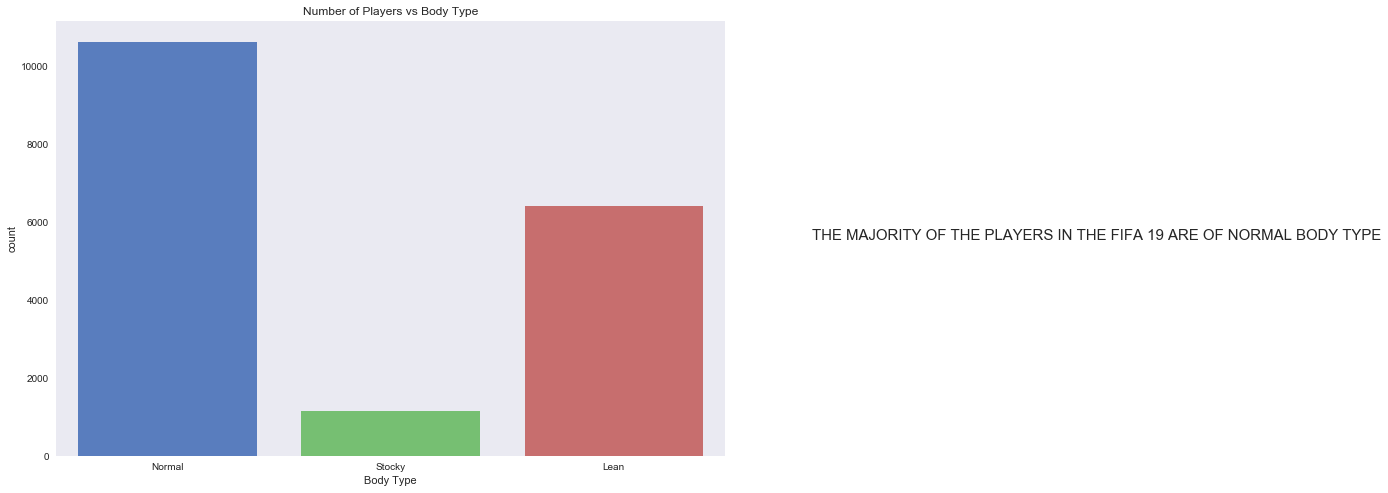

In [19]:
sns.set(style = "dark", palette = "muted", color_codes = True)
plt.figure(figsize=(12,8))
sns.countplot(x = "Body Type" , data= data)
plt.title("Number of Players vs Body Type")
plt.figtext(1,0.5,"THE MAJORITY OF THE PLAYERS IN THE FIFA 19 ARE OF NORMAL BODY TYPE",fontsize = 15)

In [20]:
data_char.isna().sum()

Name                 0
Nationality          0
Body Type           48
Club               241
Joined            1553
Position            60
Preferred Foot      48
Value                0
Wage                 0
Work Rate           48
dtype: int64

In [21]:
data["Club"].fillna('No Club', inplace = True)

In [22]:
data["Position"].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [23]:
data["Position"].fillna('Not known', inplace = True)

Text(1,0.5,'MOST PLAYERS ARE STRIKERS FOLLOWED BY GOALKEEPER AND CENTRE BACK')

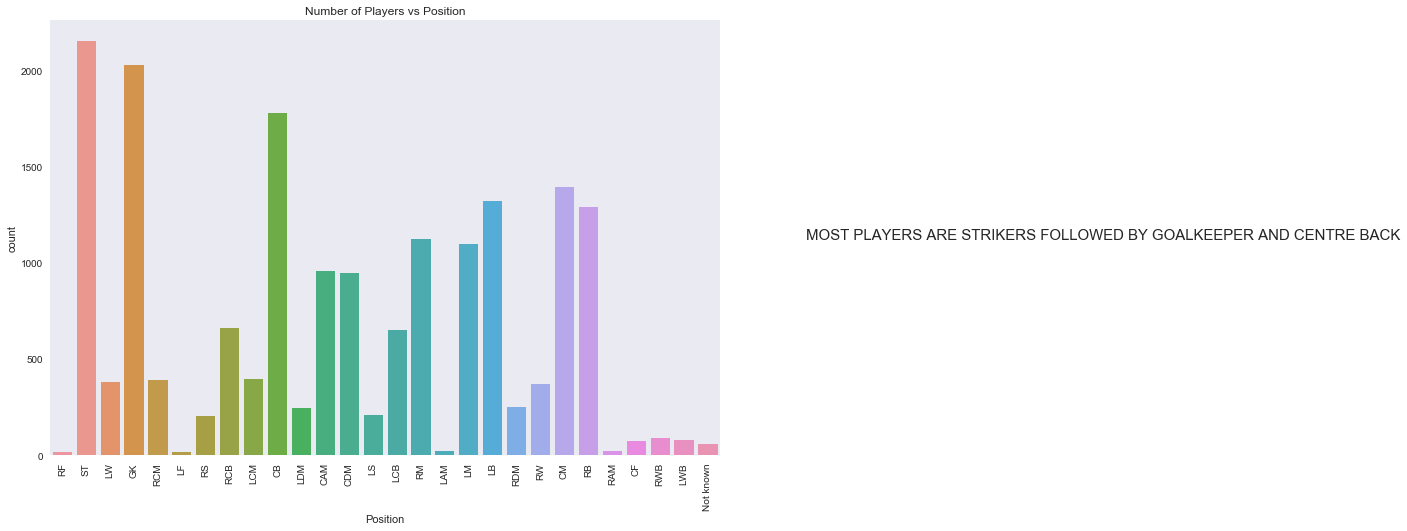

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='Position',data=data)
plt.xticks(rotation = 90)
plt.title("Number of Players vs Position")
plt.figtext(1,0.5,"MOST PLAYERS ARE STRIKERS FOLLOWED BY GOALKEEPER AND CENTRE BACK",fontsize = 15)

In [25]:
data["Preferred Foot"].fillna('Not known', inplace = True)

Text(1,0.5,'Preferred foot of maximum player is Right')

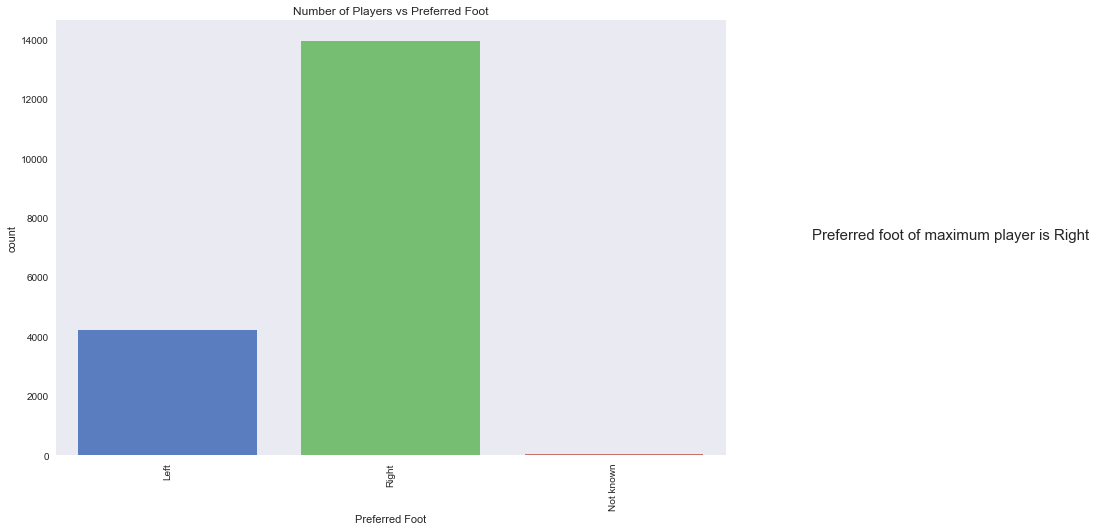

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x='Preferred Foot',data=data)
plt.xticks(rotation = 90)
plt.title("Number of Players vs Preferred Foot")
plt.figtext(1,0.5,"Preferred foot of maximum player is Right",fontsize = 15)

In [27]:
data["Work Rate"].fillna('Not known', inplace = True)

Text(1,0.5,'MEDIUM DEFENCE AND MEDIUM ATTACKING WORK RATE IS DOMINATING IN THE WORK RATE FOR THE PLAYERS')

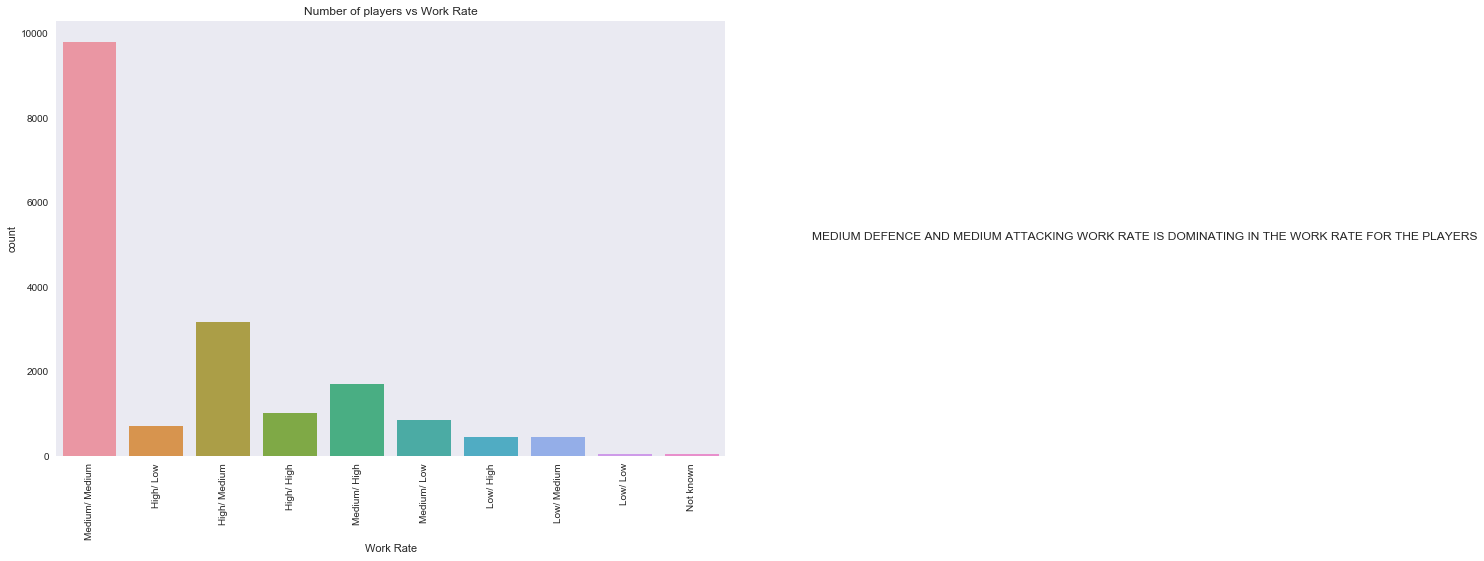

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='Work Rate',data=data)
plt.xticks(rotation = 90)
plt.title("Number of players vs Work Rate")
plt.figtext(1,0.5,"MEDIUM DEFENCE AND MEDIUM ATTACKING WORK RATE IS DOMINATING IN THE WORK RATE FOR THE PLAYERS")

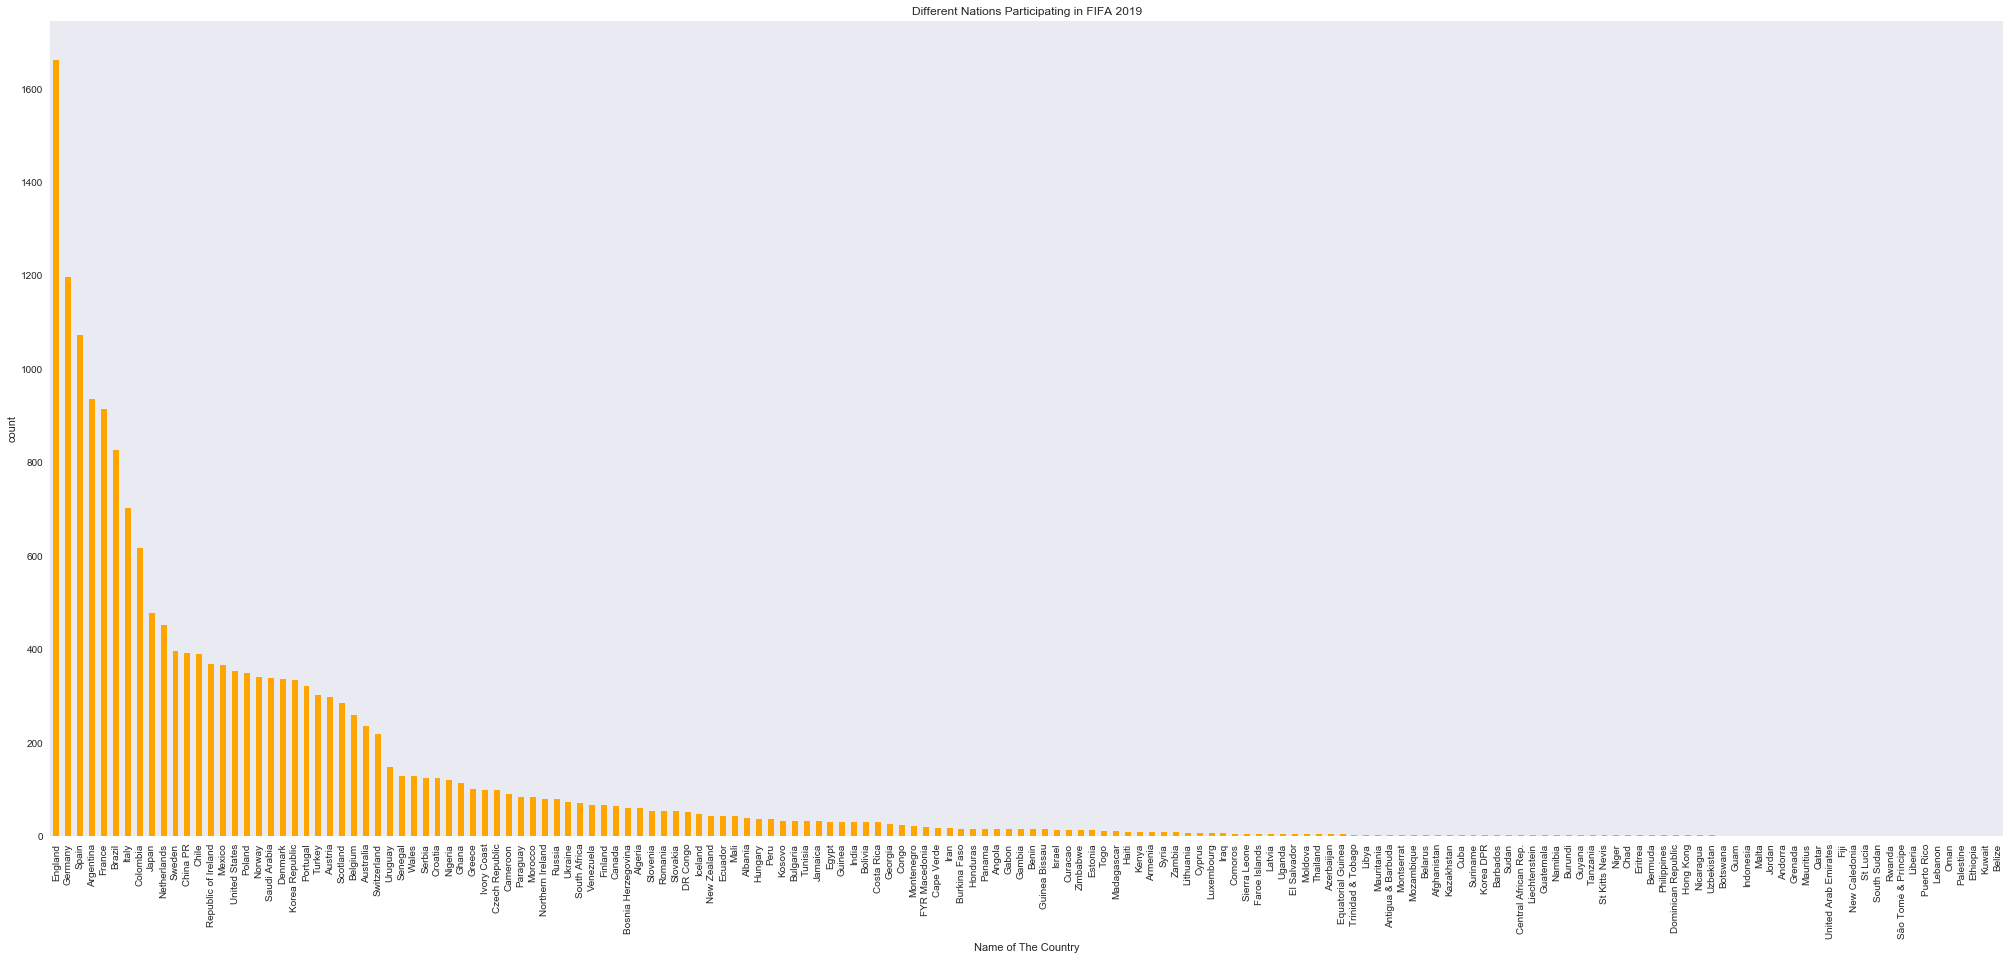

Text(0,1,'ENGLAND HAS THE LARGEST NUMBER OF PLAYERS FOLLOWED BY GERMANY AND SPAIN')

<Figure size 432x288 with 0 Axes>

In [29]:
data['Nationality'].value_counts().plot.bar(color = 'orange', figsize = (35, 15 ))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()
plt.figtext(0,1,"ENGLAND HAS THE LARGEST NUMBER OF PLAYERS FOLLOWED BY GERMANY AND SPAIN")

In [30]:
data.Wage=data['Wage'].apply(lambda x: x[1:])

In [31]:
data.Wage=data['Wage'].apply(lambda x: x[:-1])

In [32]:
data.Wage=pd.to_numeric(data['Wage'])

In [33]:
data.Value=data['Value'].apply(lambda x: x[1:])
data.Value=data['Value'].apply(lambda x: x[:-1])

In [34]:
data.Value = pd.to_numeric(data.Value)

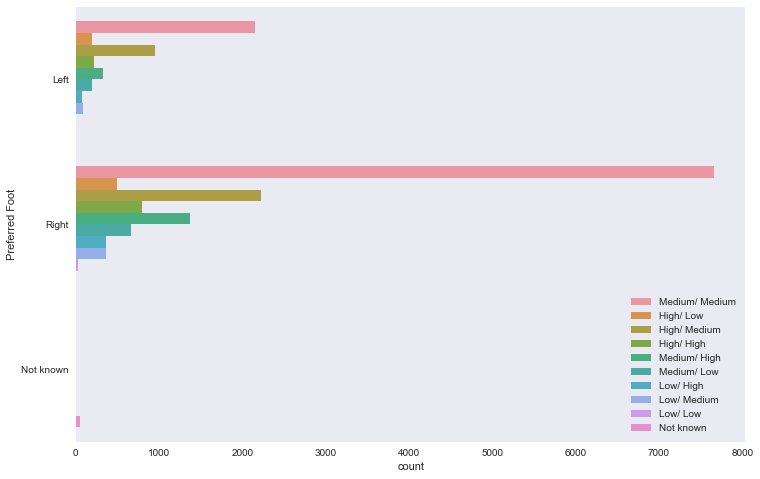

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(y = "Preferred Foot" , hue = "Work Rate", data = data)
plt.legend(loc = 'lower right')

Text(1,0.5,'MOST STRIKERS ARE RIGHT FOOTED')

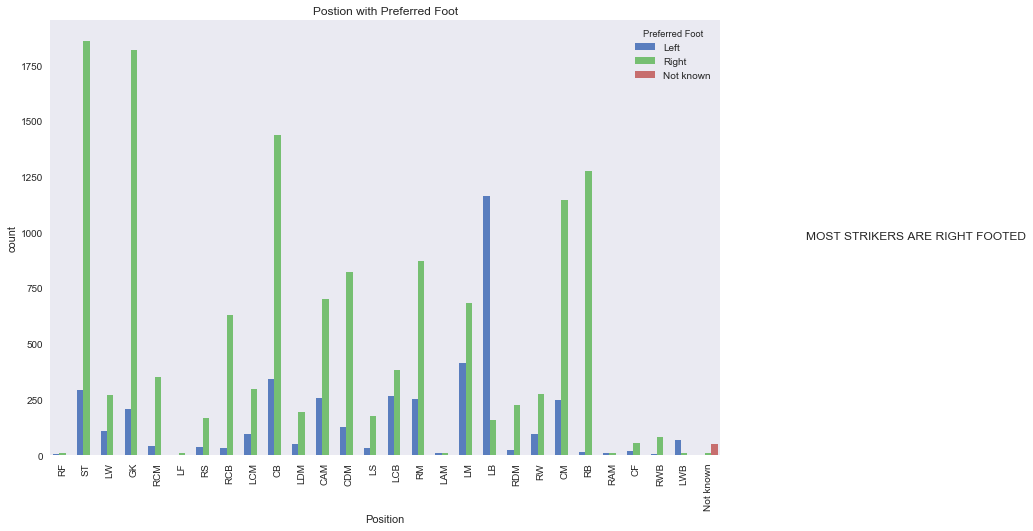

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Position" , hue = "Preferred Foot", data = data)
plt.xticks(rotation = 90)
plt.title("Postion with Preferred Foot",fontsize = 12)
plt.figtext(1,0.5,"MOST STRIKERS ARE RIGHT FOOTED")

In [37]:
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)

In [38]:
data['Weak Foot'].fillna(3, inplace = True)

In [39]:
data['International Reputation'].fillna(1, inplace = True)

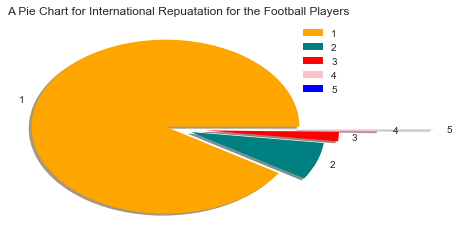

In [40]:
labels = ['1', '2', '3', '4', '5']
sizes = [16532, 1261, 309, 51, 6]
colors = ['orange', 'teal', 'red', 'pink', 'blue']
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A Pie Chart for International Repuatation for the Football Players')
plt.legend()
plt.show()

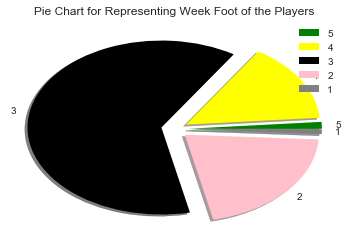

In [41]:
labels = ['5', '4', '3', '2', '1'] 
size = [229, 2662, 11349, 3761, 158]
colors = ['green', 'yellow', 'black', 'pink', 'grey']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Pie Chart for Representing Week Foot of the Players')
plt.legend()
plt.show()

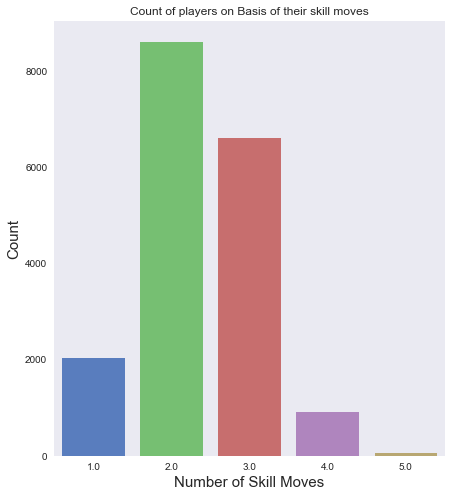

Text(1,0.5,'MOST OF THE PLAYERS HAVE 2.0 SKILL MOVES')

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Skill Moves', data = data)
ax.set_title(label = 'Count of players on Basis of their skill moves')
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 15)
ax.set_ylabel(ylabel = 'Count', fontsize = 15)
plt.show()
plt.figtext(1,0.5,"MOST OF THE PLAYERS HAVE 2.0 SKILL MOVES")

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


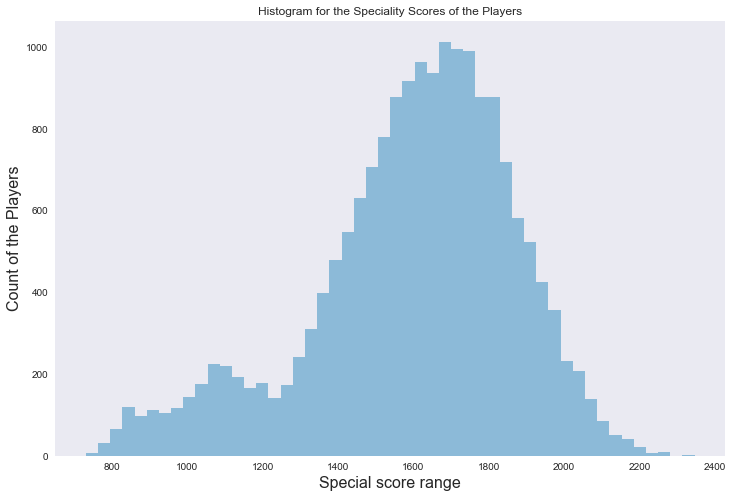

In [43]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
x = data.Special
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 50, kde = False)
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players')
plt.show()

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


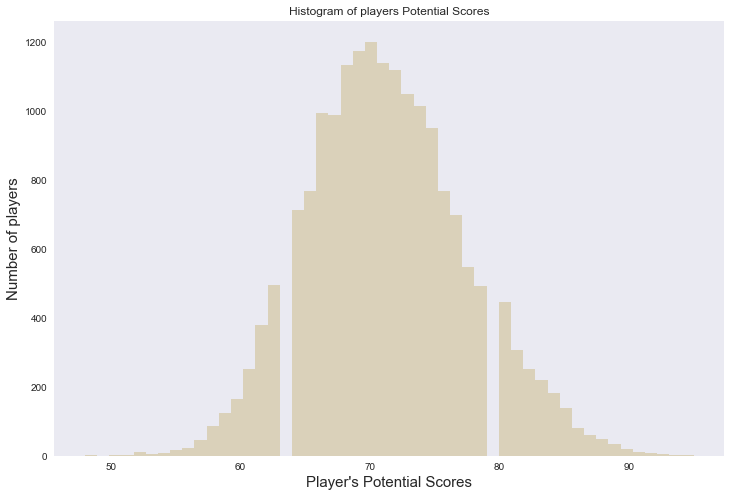

In [44]:
sns.set(style = "dark", palette = "muted", color_codes = True)
x = data.Potential
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 50, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 15)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 15)
ax.set_title(label = 'Histogram of players Potential Scores')
plt.show()

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


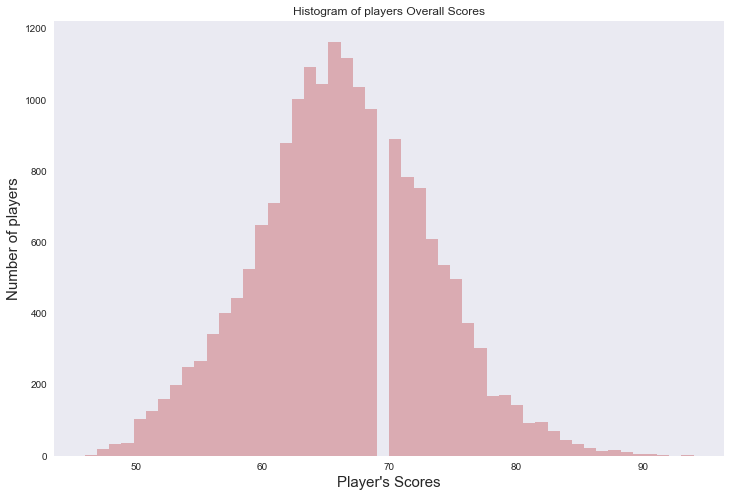

In [45]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 50, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 15)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 15)
ax.set_title(label = 'Histogram of players Overall Scores')
plt.show()

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


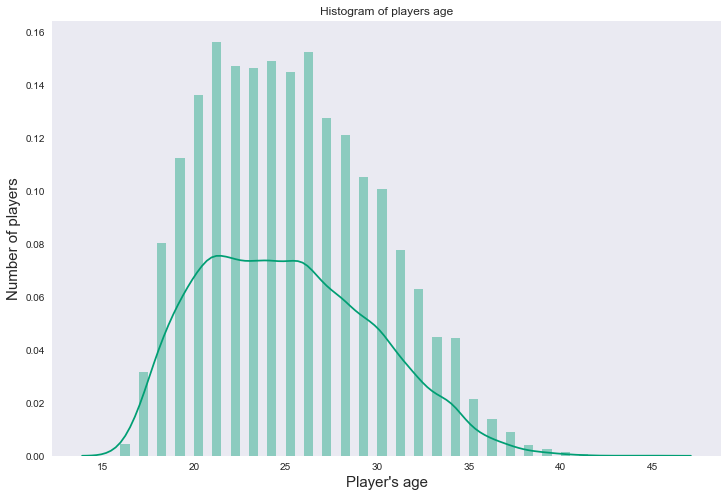

In [46]:
sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = True, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 15)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 15)
ax.set_title(label = 'Histogram of players age')
plt.show()

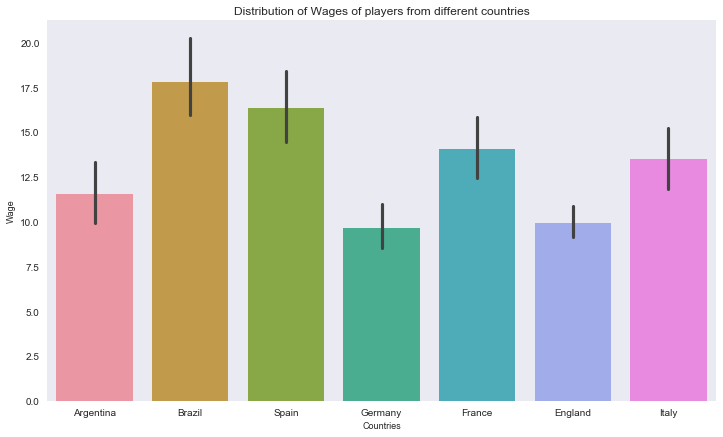

In [47]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'],)
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries')
plt.show()

Text(0,0.5,'Age')

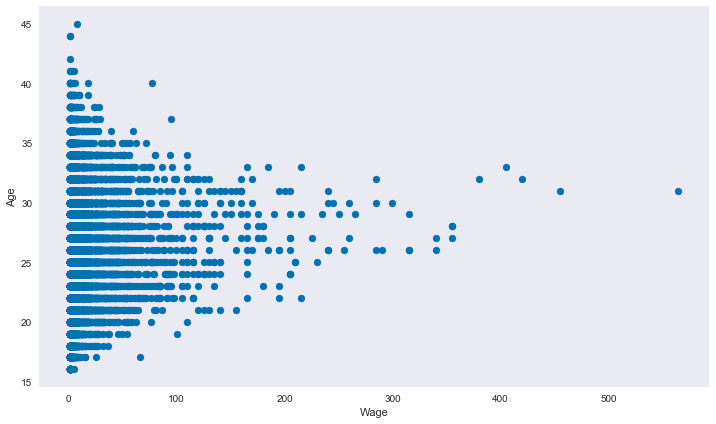

In [48]:
plt.scatter(x = "Wage", y = "Age" , data= data)
plt.xlabel("Wage")
plt.ylabel("Age")

Text(0,0.5,'Age')

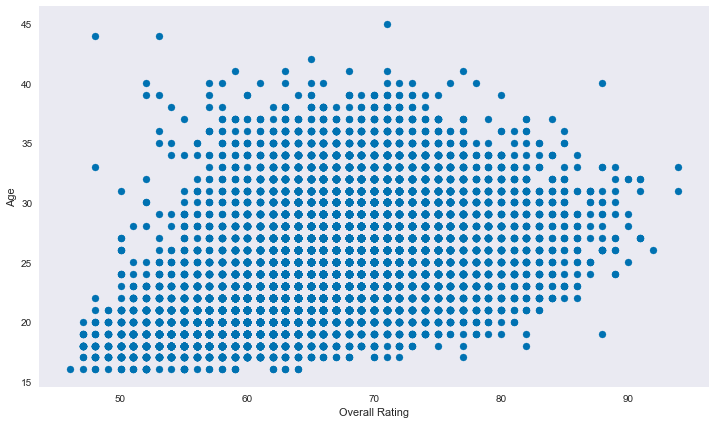

In [49]:
plt.scatter(x = "Overall" , y = "Age", data = data)
plt.xlabel("Overall Rating")
plt.ylabel("Age")

<Figure size 864x576 with 0 Axes>

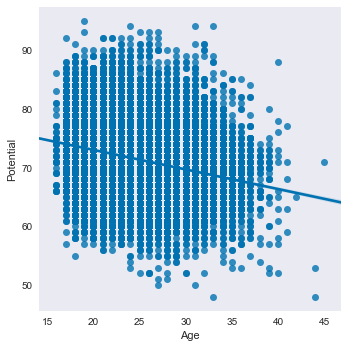

<Figure size 864x576 with 0 Axes>

In [50]:
sns.lmplot(x='Age', y="Potential", data=data,palette="coolwarm")
plt.figure(figsize=(12,8))

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


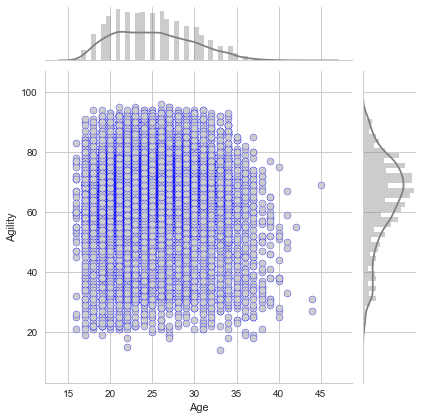

In [51]:
sns.set_style('whitegrid')
g = sns.JointGrid(x='Age', y='Agility',data=data)
g = g.plot_joint(plt.scatter, color="0.8", edgecolor="blue", )
g = g.plot_marginals(sns.distplot, kde=True, color=".5")

Text(0.5,1,'SPRINT SPEEDS OF THE PLAYERS')

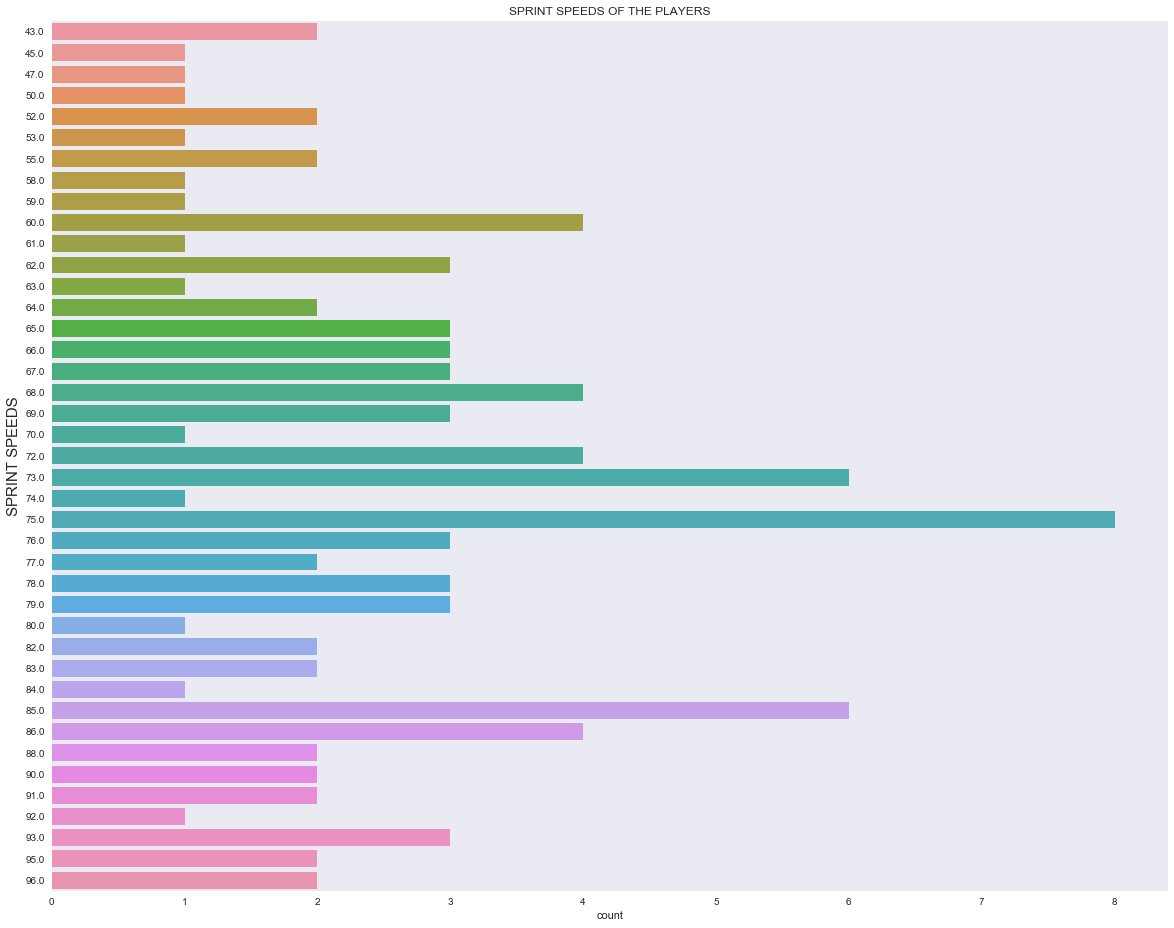

In [52]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
plt.figure(figsize = (20, 16))
sns.countplot(y = data['SprintSpeed'].values[:100])
plt.ylabel('SPRINT SPEEDS', fontsize = 15)
plt.title('SPRINT SPEEDS OF THE PLAYERS')

Text(0.5,1,'Distribution of age in some clubs')

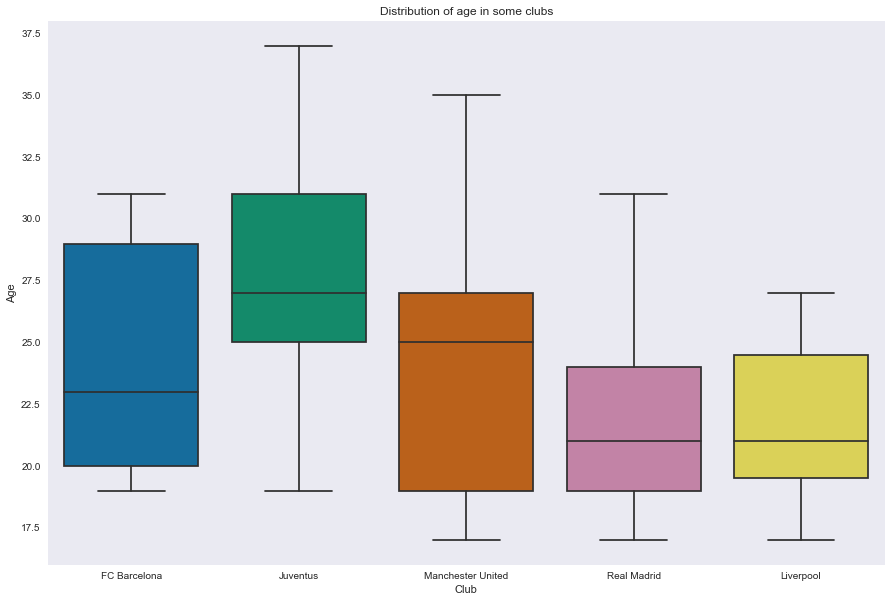

In [53]:
# Compare six clubs in relation to age
club_names = ('Real Madrid', 'Liverpool', 'Juventus', 'Manchester United', 'FC Barcelona')
data_club = data.loc[data['Club'].isin(club_names) & data['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.boxplot(x = "Club", y = "Age", data = data_club);
ax.set_title('Distribution of age in some clubs') 


# Juventus has the oldest squad with an average squad age of 28

In [54]:
# Youngest players in the dataset

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [55]:
# Oldest players in the dataset

oldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(oldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [56]:
import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,28.0
M. Ogasawara,Kashima Antlers,21.0
H. Sogahata,Kashima Antlers,21.0
M. Al Shalhoub,Al Hilal,21.0
S. Narazaki,Nagoya Grampus,20.0
M. Wölfli,BSC Young Boys,19.0
K. Kitamoto,Vissel Kobe,19.0
C. Källqvist,BK Häcken,18.0
Y. Endo,Gamba Osaka,18.0


In [57]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


In [58]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


In [59]:
# best players from each positions with their age, nationality, club based on their potential scores

data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany
